### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [71]:
data = pd.read_csv('data/coupons.csv')
# data.head()
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4448,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,below21,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,0
716,Work,Alone,Sunny,55,7AM,Bar,1d,Male,36,Unmarried partner,...,never,4~8,gt8,less1,1,1,1,0,1,1
11375,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Female,21,Married partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,1
10250,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,31,Married partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,0
8813,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,36,Married partner,...,never,less1,1~3,1~3,1,0,0,0,1,0
10479,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,31,Unmarried partner,...,less1,1~3,1~3,less1,1,1,0,0,1,1
8231,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,50plus,Widowed,...,never,1~3,less1,less1,1,1,1,0,1,0
1444,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,46,Single,...,never,1~3,less1,less1,1,1,0,0,1,1
1279,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,50plus,Widowed,...,never,less1,1~3,less1,1,0,0,0,1,1
7000,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,31,Married partner,...,1~3,less1,1~3,1~3,1,1,0,0,1,1


In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [11]:
## Getting counts and percentages of missing values for each column
data.isna().sum()
data.isna().mean().round(2).multiply(100).sort_values(ascending= False)
## The variable car is virtually empty (99%) missing so I will ignore it from now on. 
## CoffeeHouse, Restaurant20To50, RestaurantLessThan20,  CarryAway, Bar     have 1-2% missingness rate            

car                     99.0
CoffeeHouse              2.0
Restaurant20To50         1.0
RestaurantLessThan20     1.0
CarryAway                1.0
Bar                      1.0
destination              0.0
passanger                0.0
direction_opp            0.0
direction_same           0.0
toCoupon_GEQ25min        0.0
toCoupon_GEQ15min        0.0
toCoupon_GEQ5min         0.0
income                   0.0
occupation               0.0
education                0.0
has_children             0.0
maritalStatus            0.0
age                      0.0
gender                   0.0
expiration               0.0
coupon                   0.0
time                     0.0
temperature              0.0
weather                  0.0
Y                        0.0
dtype: float64

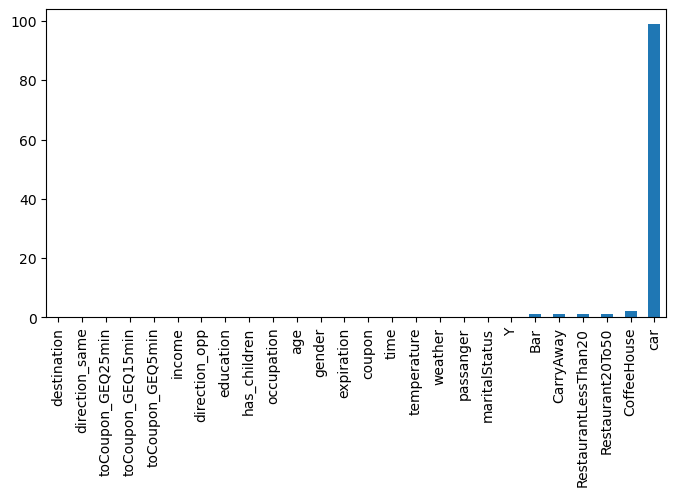

In [41]:
## Visualize the relative frequency of missing data with a bar plot for each variable.
plt.rcParams['figure.figsize'] = [8,4]
data.isna().mean().round(2).multiply(100).sort_values().plot(kind = "bar");

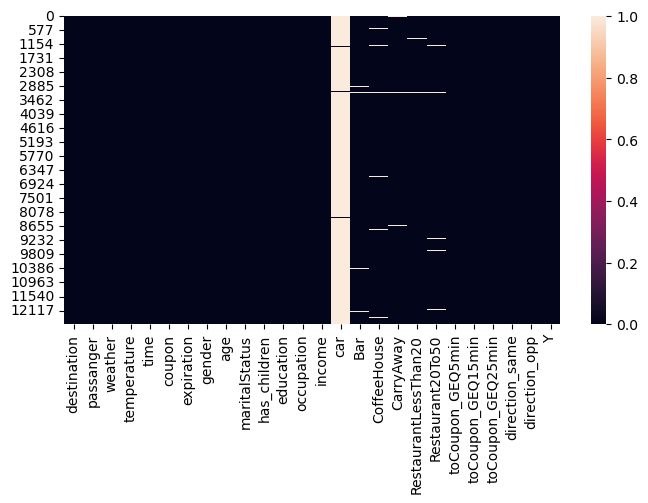

In [43]:
## Using a heat map to see if the missing data occur at random
sns.heatmap(data.isna());
## I do not see a problematic trend of clustered missing values so I think they might be missing at random 

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
Bar                      1.0
CoffeeHouse              2.0
CarryAway                1.0
RestaurantLessThan20     1.0
Restaurant20To50         1.0

In [49]:
## I will ignore the column labeled car and fill NA's with the mode because the variables are categorical. 

# Fill missing values in the "Bar" column with the mode beacause they are all categorical

data["Bar"].fillna(data["Bar"].mode().iloc[0], inplace=True)
data["CoffeeHouse"].fillna(data["CoffeeHouse"].mode().iloc[0], inplace=True)
data["CarryAway"].fillna(data["CarryAway"].mode().iloc[0], inplace=True)
data["RestaurantLessThan20"].fillna(data["RestaurantLessThan20"].mode().iloc[0], inplace=True)
data["Restaurant20To50"].fillna(data["Restaurant20To50"].mode().iloc[0], inplace=True)
## 
## Verify that there are no more missing values except for the car variable
data.isna().mean().sort_values(ascending=False)


car                     0.991485
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
Restaurant20To50        0.000000
RestaurantLessThan20    0.000000
CarryAway               0.000000
CoffeeHouse             0.000000
Bar                     0.000000
income                  0.000000
occupation              0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
Y                       0.000000
dtype: float64

## Checking for Duplicates:

In [51]:
# Drop row #74 (assuming the index is 74)
data = data.drop(74)
# data.shape()

4. What proportion of the total observations chose to accept the coupon?



In [53]:
data["Y"].mean().round(3)

0.568

57% of the total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2392
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

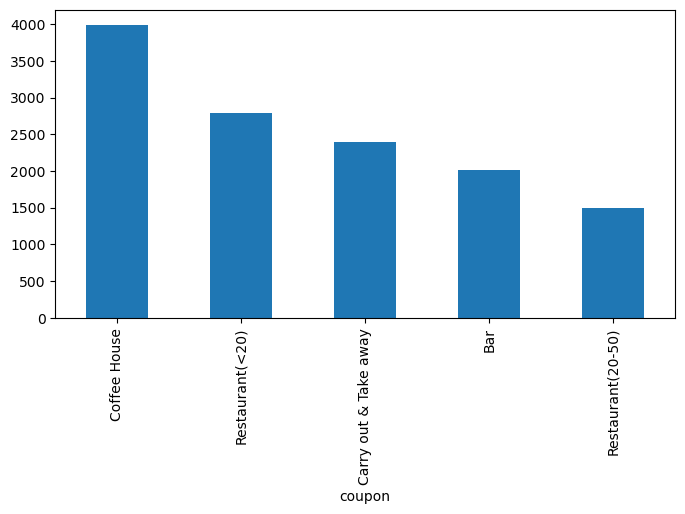

In [55]:
display(data['coupon'].value_counts())
data['coupon'].value_counts().plot(kind = "bar");

6. Use a histogram to visualize the temperature column.

<Axes: ylabel='Frequency'>

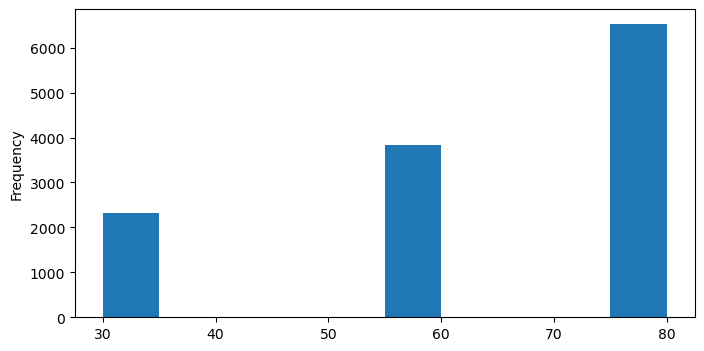

In [57]:
data['temperature'].plot(kind="hist")

In [61]:
## Getting a summary of categorical variables (sample size, number of levels, freq of the most popular response).
data.describe(include="object")

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12683,12683,12683,12683,12683,12683,12683,12683,12683,12683,12683,12683,108,12683,12683,12683,12683,12683
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6282,7305,10068,3230,3996,7091,6511,2653,5099,4351,1870,2013,22,5304,3602,4822,5505,6265


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [63]:
BarCoupons=data[data["coupon"]=="Bar"]
BarCoupons.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,57.590481,0.433813,1.0,0.663361,0.252851,0.209222,0.790778,0.410015
std,17.950408,0.495723,0.0,0.472677,0.434754,0.406854,0.406854,0.491958
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. What proportion of bar coupons were accepted?


In [65]:
BarCoupons["Y"].mean().round(2)

0.41

41% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [93]:
BarCoupons.groupby("Bar")["Y"].mean().round(3).sort_values()
 

Bar
never    0.193
less1    0.444
1~3      0.647
gt8      0.735
4~8      0.780
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [123]:
BarCoupons.groupby(["Bar", "age"])["Y"].mean().round(2)
## filter out age levels " below21" and "21"
## filter out Bar levels "never", "less1"
# BarCoupons$BarMonthly =ifelse(("Bar" isin ["less1","never"]), "less1","more1")
# Filter out rows where age is below 21 or 21
filtered_data = BarCoupons[~BarCoupons["age"].isin(["below21", "21"])]

# Create a new column 'BarMonthly' based on bar frequency
filtered_data["BarMonthly"] = filtered_data["Bar"].apply(lambda x: "more1" if x not in ["less1", "never"] else "less1")

# Create two groups: 
# 1. Drivers who go to a bar more than once a month and are over the age of 25
# 2. All other drivers
group1 = filtered_data[(filtered_data["BarMonthly"] == "more1") & (filtered_data["age"] > "25")]
group2 = filtered_data[(filtered_data["BarMonthly"] == "less1") | (filtered_data["age"] <= "25")]

# Calculate the acceptance rate for both groups
group1_acceptance_rate = group1["Y"].mean().round(2)
group2_acceptance_rate = group2["Y"].mean().round(2)

# Print results
print([group1_acceptance_rate,group2_acceptance_rate])


[0.7, 0.26]


C:\Users\amhasan1\AppData\Local\Temp\ipykernel_17636\1666202439.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["BarMonthly"] = filtered_data["Bar"].apply(lambda x: "more1" if x not in ["less1", "never"] else "less1")


## Result:
Acceptance rate for drivers who go to a bar more than once a month and are over 25: 70%
Acceptance rate for all other drivers: 26%
## Drivers who go to a bar more than once a month and are over 25 are 70% likely to accept the coupon. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [125]:
# Create a new group for drivers who go to bars more than once a month and had passengers that were not a kid
# and had occupations other than farming, fishing, or forestry

df =  BarCoupons
group3 = df[(df['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # Visit bars more than once a month
    (df['passanger'] != 'Kid(s)') &            # Passengers were not kids
    (~df['occupation'].isin(['Farming', 'Fishing', 'Forestry']))  # Excluding specific occupations
]
# group3.head(10)

## Creating group 4 by using the complement of the conditions for Group 3
group4 = df[~(df['Bar'].isin(['1~3', '4~8', 'gt8'])) | 
    (df['passanger'] == 'Kid(s)') |            
    (df['occupation'].isin(['Farming', 'Fishing', 'Forestry']))  
]
group4.describe(include="object")
group4.head()

# Calculate the acceptance rate for both groups
group3_acceptance_rate = group3["Y"].mean().round(2)
group4_acceptance_rate = group4["Y"].mean().round(2)

# Print results
print([group3_acceptance_rate,group4_acceptance_rate])

[0.71, 0.3]


In [ ]:
## Insights:
## drivers who go to bars more than once a month and had passengers that were not a kid
# and had occupations other than farming, fishing, or forestry had a much higher acceptance_rate (71%) than other drivers (30%)
# Send more bar coupons to passengers who meet these attributes. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [131]:

 #   go to bars more than once a month, had passengers that were not a kid, and were not widowed 

group5 = df[~(df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    ~(df['passanger'] == 'Kid(s)')&           
    ~(df['maritalStatus'].isin(['Widowed']))  
]
group5.describe(include="object")
group5.head()

# Calculate the acceptance rate for both groups
group5_acceptance_rate = group5["Y"].mean().round(2)
 #   go to bars more than once a month and are under the age of 30 OR
 #   go to cheap restaurants more than 4 times a month and income is less than 50K.
# Print results
print([group5_acceptance_rate])

[0.31]


In [137]:

 # go to bars more than once a month and are under the age of 30 

group6 = df[~(df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    ~(df['age'] <'30') &            
    ~(df['maritalStatus'].isin(['Widowed']))  
]
group6.describe(include="object")
group6.head()

# Calculate the acceptance rate for both groups
group6_acceptance_rate = group6["Y"].mean().round(2)
 #   go to bars more than once a month and are under the age of 30 OR
 #   go to cheap restaurants more than 4 times a month and income is less than 50K.
# Print results
print([group6_acceptance_rate])

[0.27]


income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

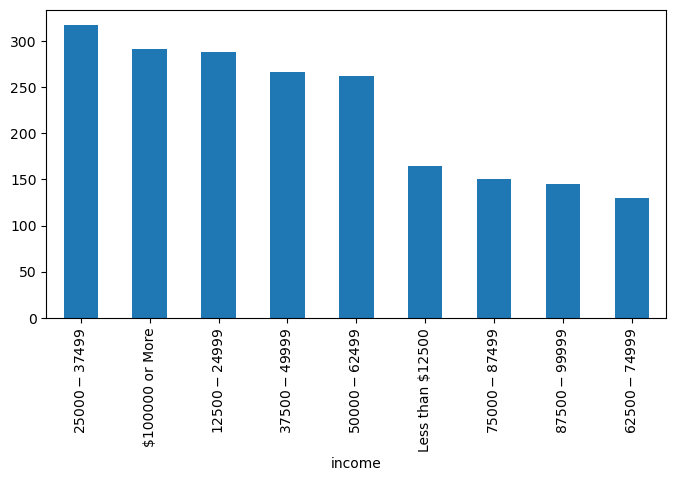

In [145]:
display(df['income'].value_counts())
df['income'].value_counts().plot(kind = "bar");

RestaurantLessThan20
1~3      901
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64

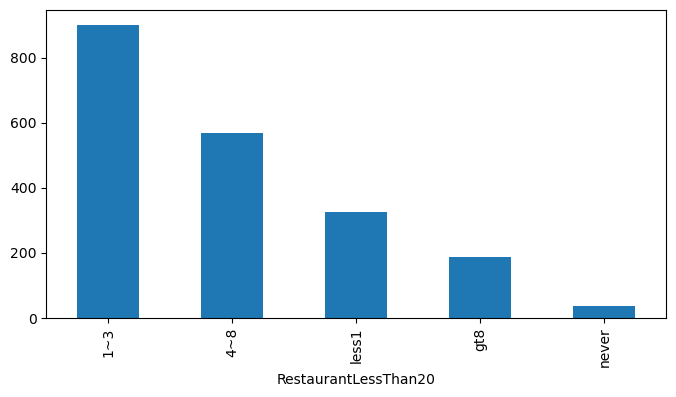

In [147]:
display(df['RestaurantLessThan20'].value_counts())
df['RestaurantLessThan20'].value_counts().plot(kind = "bar");

In [151]:

 # go to cheap restaurants more than 4 times a month and income is less than 50K.

group6 = df[~(df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (df['income'].isin(['$25000 - $37499', '$12500 - $24999',  '$37500 - $49999'  ]))  
]
group6.describe(include="object")
group6.head()

# Calculate the acceptance rate for both groups
group6_acceptance_rate = group6["Y"].mean().round(2)
 #   go to bars more than once a month and are under the age of 30 OR
 #   go to cheap restaurants more than 4 times a month and income is less than 50K.
# Print results
print([group6_acceptance_rate])

[0.39]


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?



## Drivers who go to a bar more than once a month and are over 25 are 70% likely to accept the coupon.
## Drivers who go to bars more than once a month, had passengers who were not kids, and had occupations other than farming, fishing, or forestry had a  higher acceptance_rate (71%) than other drivers (30%)
## Other Driver groups have a lower probability of accepting the bar coupons (20-41%)


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  